In [27]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict): 
    name: str
    game: Literal["soccer", "basketball"]



In [ ]:
def play_game(state: TypeDictState):
    print("---Play Game node has been called--")
    return {"name": state["name"] + " wants to play "}

def soccer(state: TypeDictState):
    print("--Soccer node has been called--")
    return {"name": state["name"] + " soccer", "game": "soccer"}

def basketball(state: TypeDictState):
    print("--Soccer node has been called--")
    return {"name": state["name"] + " soccer", "game": "basketball"}

In [29]:
import random
def decide_play(state: TypeDictState) -> Literal["soccer", "basketball"]:
    if random.random() < 0.5:
        return "soccer"
    else:
        return "basketball"

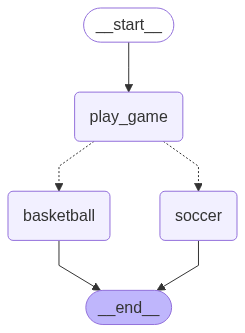

In [30]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(TypeDictState)
builder.add_node("play_game", play_game)
builder.add_node("soccer", soccer)
builder.add_node("basketball", basketball)

## Flow of the graph

builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_play)
builder.add_edge("soccer", END)
builder.add_edge("basketball", END)

## Add
graph = builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
graph.invoke({"name": "Ibo"})

---Play Game node has been called--
--Soccer node has been called--


{'name': 'Ibo', 'game': 'basketball'}

In [35]:
### Dataclasses

from dataclasses import dataclass

@dataclass
class DataClassState:
    name: str
    game: Literal["soccer", "basketball"]

In [36]:
def play_game(state: DataClassState):
    print("---Play Game node has been called--")
    return {"name": state.name + " wants to play "}

def soccer(state: DataClassState):
    print("--Soccer node has been called--")
    return {"name": state.name+ " soccer", "game": "soccer"}

def basketball(state: DataClassState):
    print("--Soccer node has been called--")
    return {"name": state.name + " soccer", "game": "basketball"}

In [37]:
import random
def decide_play(state: DataClassState) -> Literal["soccer", "basketball"]:
    if random.random() < 0.5:
        return "soccer"
    else:
        return "basketball"

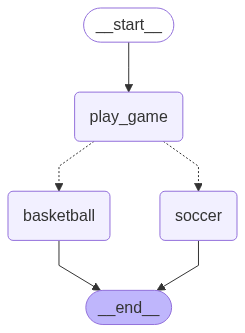

In [38]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(DataClassState)
builder.add_node("play_game", play_game)
builder.add_node("soccer", soccer)
builder.add_node("basketball", basketball)

## Flow of the graph

builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_play)
builder.add_edge("soccer", END)
builder.add_edge("basketball", END)

## Add
graph = builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
graph.invoke(DataClassState(name="Ibo", game="basketball"))

---Play Game node has been called--
--Soccer node has been called--


{'name': 'Ibo wants to play  soccer', 'game': 'soccer'}